In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# invert pulses false, 500 trigger delay, 170 trigger threshold
f_name = 'data/test7.h5'
f_data = h5py.File(f_name,'r')
raw_data0 = f_data['raw_data'][()]
print(raw_data0.shape)
# invert pulses false, 500 trigger delay, 120 trigger threshold
f_name = 'data/test0.h5'
f_data = h5py.File(f_name,'r')
raw_data1 = f_data['raw_data'][()]
print(raw_data1.shape)

(177, 50000)
(2223, 50000)


## plot all pulses

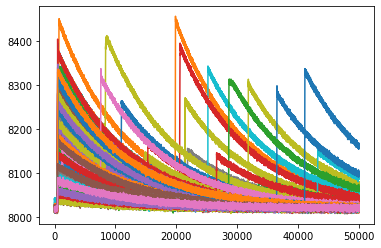

In [3]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data0)):
    plt.plot(raw_data0[i])
plt.show()

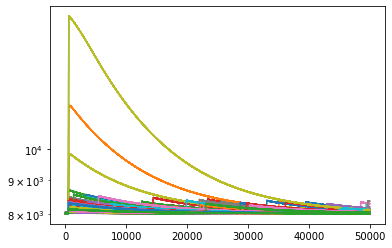

In [4]:
# plot all pulses
# test 0
plt.figure()
for i in range(len(raw_data1)):
    plt.plot(raw_data1[i])
plt.semilogy()
plt.show()

## plot downsampled pulses

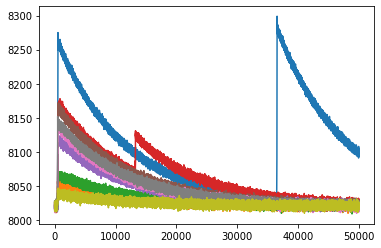

In [5]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data0))
    plt.plot(raw_data0[n])
plt.show()

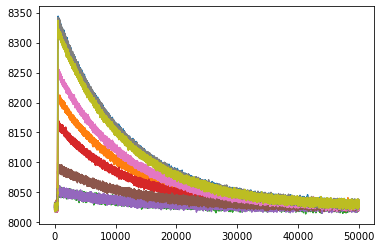

In [6]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data1))
    plt.plot(raw_data1[n])
plt.show()

## Single pulses

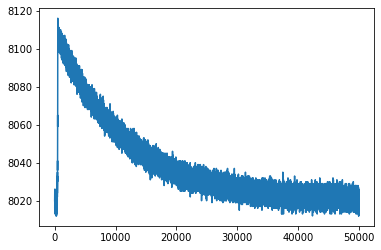

In [7]:
# plot single pulse
plt.figure()
plt.plot(raw_data0[0])
plt.show()

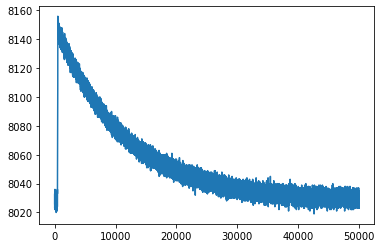

In [8]:
# plot single pulse
plt.figure()
plt.plot(raw_data1[0])
plt.show()

# digital shaping

In [8]:
raw_data1[0]

array([8026, 8028, 8033, ..., 8030, 8031, 8030], dtype=uint16)

In [13]:
pulse = raw_data1[0]

In [15]:
pulse.max()

8156

In [16]:
pulse.min()

8019

In [ ]:
# should decay by RC constant
# only data we need is in the rise - don't need decay


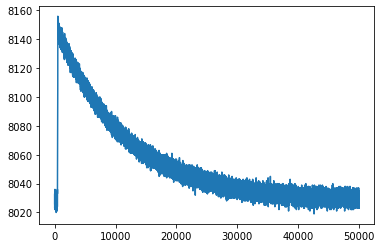

In [18]:
plt.figure()
plt.plot(pulse)
plt.show()

In [19]:
pulse[1]-pulse[0]

2

In [22]:
diff = np.zeros(len(pulse)-1)
for i in range(len(pulse)-1):
    diff[i] = pulse[i+1]-pulse[i]

/var/folders/9q/zxs3bttx79j7gy8t3m35pzm40000gn/T/ipykernel_20847/2577041442.py:3: RuntimeWarning: overflow encountered in ushort_scalars
  diff[i] = pulse[i+1]-pulse[i]


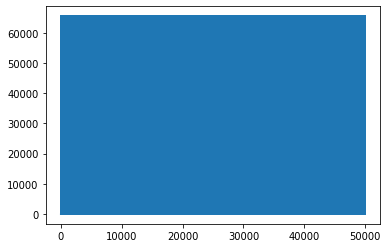

In [30]:
plt.figure()
plt.plot(diff)
plt.show()

In [28]:
diff

array([2.0000e+00, 5.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
       6.5535e+04])

In [29]:
pulse[1]-pulse[0]

2

In [31]:
diff.max()

65535.0

In [32]:
diff.min()

0.0

5334